In [1]:
from DataProcessor import DataProcessor
from BayesianModelTrainer import BayesianModelTrainer
from GibbsSampler import GibbsSampler

In [2]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import pymc3 as pm

In [7]:

class TestRunner:
    def __init__(self, file_path):
        self.file_path = file_path
        self.data_processor = DataProcessor(file_path)
        self.bayesian_trainer = None
        self.gibbs_sampler = None
        
    def process_data(self):
        self.data_processor.load_data()
        self.data_processor.describe_data()
        self.data_processor.handle_missing_values()
        self.data_processor.preprocess_timestamp()
        self.data_processor.sort_by_timestamp()
        self.data_processor.select_columns(["Timestamp","PM2.5"])
        self.data_processor.scale_pm25()
        self.data_processor.plot_pm25_levels()  
        
    def testModel(self):
        self.data_processor.load_data()
        processed_data = self.data_processor.data
            
        #BayesianModelTrainer instance
        self.bayesian_trainer = BayesianModelTrainer(processed_data)
            
        self.bayesian_trainer.specify_model()
        self.bayesian_trainer.train_model()
        self.bayesian_trainer.visualize_model()
        
    def run_gibbs_sampling(self):
        processed_data = self.data_processor.data
        
        #GibbsSampler
        self.gibbs_sampler = GibbsSampler(processed_data)
        self.gibbs_sampler.run_gibbs_sampler()
        self.gibbs_sampler.visualize_trace()
        
    def forecast_pm25(self, num_samples):
        with self.m:
            pm.set_data({"pm25_observation:": np.zeros(num_samples)})
            forecasted_samples = pm.sample_posterior_predictive(self.trace, sample=num_samples)
        forecasted_pm25_samples = forecasted_samples["pm25_observation"]
        return forecasted_pm25_samples
        
    def evaluate_forecast_accuracy(self):
        self.data_processor.load_data()
        processed_test_data = self.data_processor.data
        # test_data_processor = DataProcessor("air-quality-india.csv")
        # test_data_processor.load_data()
        test_pm25_values = processed_test_data["PM2.5"]
        test_timestamps = processed_test_data["Timestamp"]
        
        #actual data
        true_data_processor = DataProcessor("air_quality_india_2023.csv")
        true_data_processor.load_data()
        true_pm25_values = true_data_processor.data["PM2.5(ug/m3)"]
        forecasted_pm25_values = self.forecast_pm25()
        mae = mean_absolute_error(true_pm25_values, forecasted_pm25_values)
        rmse = np.sqrt(mean_squared_error(true_pm25_values, test_pm25_values))
        
        print("Mean Absolute Error". mae)
        print("Root Mean Squared Error", rmse)
        print("Comparing Actual 2023 PM2.5 Levels with the forecasted ones calculated")
        self.plot_forecast_vs_true(true_pm25_values, forecasted_pm25_values)
        
    def plot_forecast_vs_true(self,forecasted_values):
        true_data_processor = DataProcessor("air_quality_india_2023.csv")
        true_data_processor.load_data()
        true_values - true_data_processor.data["PM2.5"]
        
        plt.figure(figsize=(12,6))
        plt.plot(true_values, label="True PM2.5 Levels", linestyle="--",marker="o")
        plt.plot(np.mean(forecasted_values, axis=0), label="Forecasted PM2.5 Levels", linestyle="-", marker="o")
        plt.title("True vs Forecasted PM2.5 Levels")
        plt.xlabel("Timestamp")
        plt.ylabel("PM2.5 Levels")
        plt.legend()
        plt.show()
        
    

               Year         Month           Day          Hour         PM2.5
count  36192.000000  36192.000000  36192.000000  36192.000000  36192.000000
mean    2019.682278      6.331841     15.716401     11.477840     49.308429
std        1.345011      3.593321      8.859769      6.925088     24.863511
min     2017.000000      1.000000      1.000000      0.000000      7.020000
25%     2019.000000      3.000000      8.000000      5.000000     28.080000
50%     2020.000000      6.000000     16.000000     11.000000     45.730000
75%     2021.000000     10.000000     23.000000     17.000000     64.520000
max     2022.000000     12.000000     31.000000     23.000000    245.630000
No missing values found


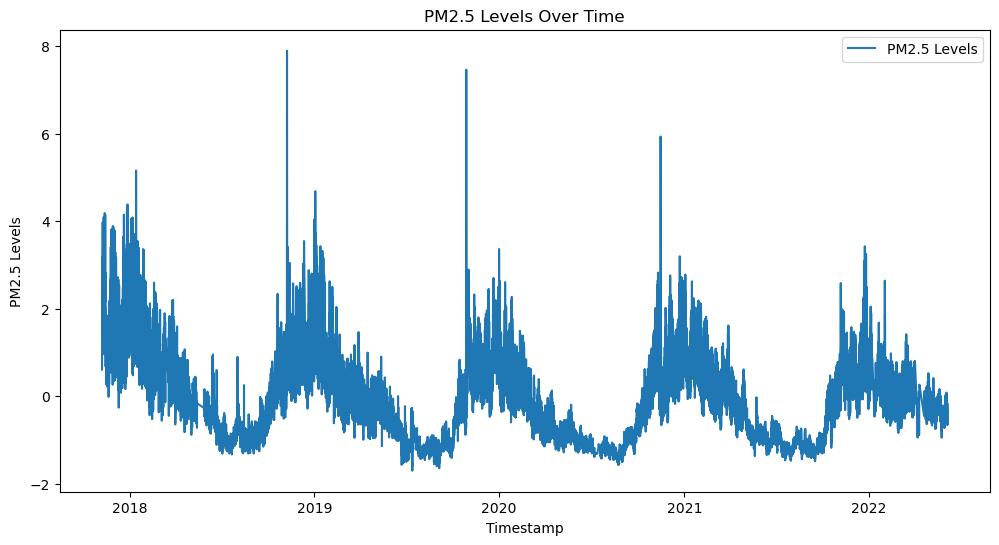

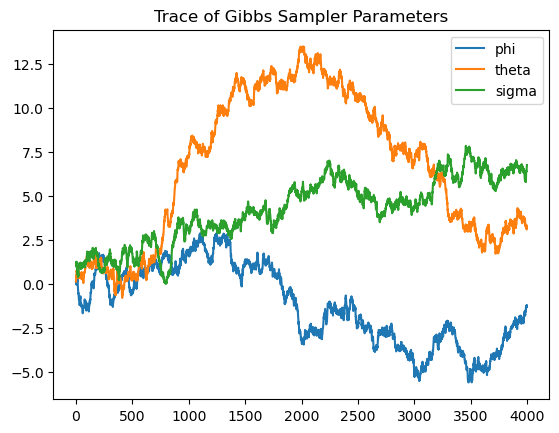

KeyError: 'PM2.5(ug/m3)'

In [8]:
if __name__ == "__main__":
    file_path = "air-quality-india.csv"
    testRunner = TestRunner(file_path)
    #Step 1 - Process Data
    testRunner.process_data()  
    #Step2 - Bayesian Model
    # testRunner.testModel()
    #Step 3 Gibbs Sampling
    testRunner.run_gibbs_sampling()
    #Step 4 - Evaluation
    testRunner.evaluate_forecast_accuracy()